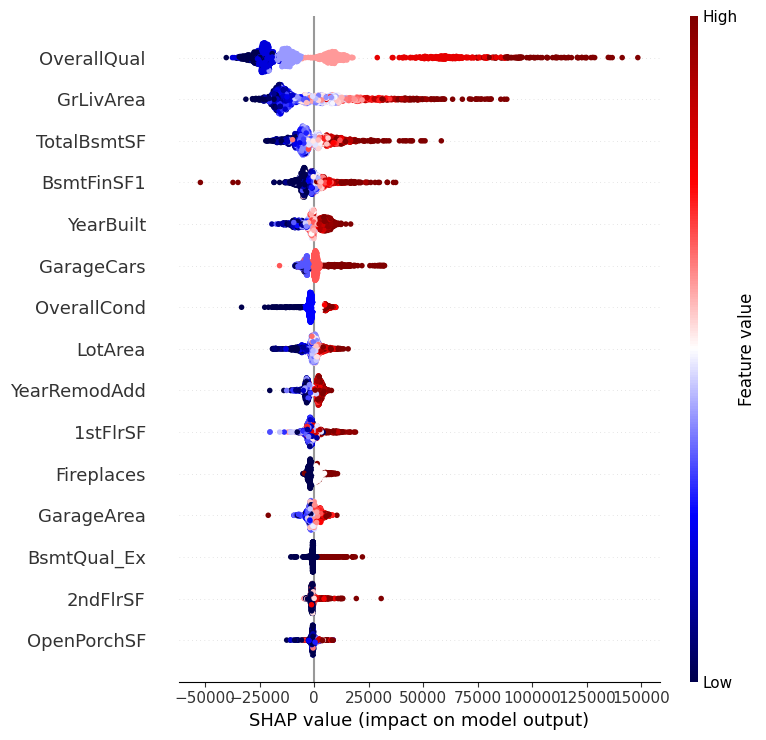

<Axes: title={'center': 'Feature importance'}, xlabel='F score', ylabel='Features'>

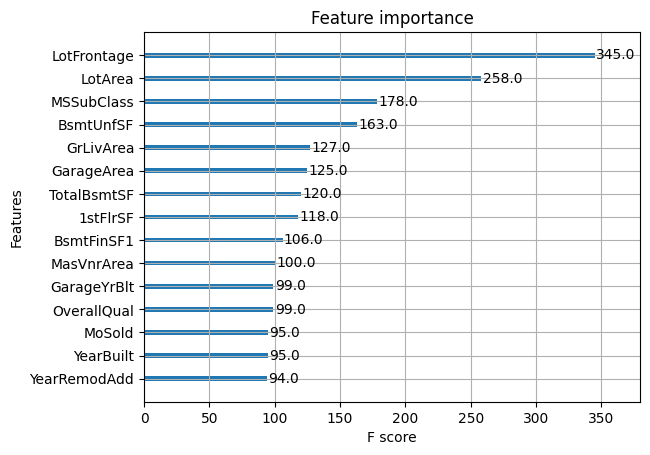

In [5]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import xgboost as xgb
import shap
import matplotlib.pyplot as plt

train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

X_train = train.iloc[:, 1:-1]
y_train = train.iloc[:, -1]

X_train = pd.get_dummies(X_train)
test = pd.get_dummies(test)

missing_cols = set(X_train.columns) - set(test.columns)
for c in missing_cols:
    test[c] = 0
test = test[X_train.columns]

model = xgb.XGBRegressor()
model.fit(X_train, y_train)

explainer = shap.Explainer(model)
shap_values = explainer(test)

shap.summary_plot(shap_values, test, max_display=15, cmap='seismic')

xgb.plot_importance(model, max_num_features=15 )